## Infer algebraic relationship between columns

- Frequently a column contains a derived value which is obtained by combining values in from columns in one or more tables. E.g. extended_amount = quantity * price. Infer the relationship between source and target columns based on table metadata and sample of data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from itertools import chain, combinations
from itertools import combinations_with_replacement as combinations_w_r


In [2]:
excel_file = pd.ExcelFile('./new_Test_Dataset.xlsx')
data = pd.read_excel(excel_file, 'Dataset1', encoding='utf-8')

In [3]:
data.dtypes

Input1       int64
Input2       int64
Input3       int64
Input4       int64
Input5       int64
Input6       int64
Input7       int64
Input8       int64
Input9      object
Input10      int64
Input11      int64
Input12      int64
Input13    float64
Input14    float64
Input15      int64
Input16      int64
Input17    float64
Input18    float64
Input19    float64
Input20    float64
Input21    float64
Input22    float64
Input23    float64
Input24      int64
Input25      int64
Input26      int64
Output1    float64
dtype: object

In [4]:
data.head()

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,...,Input18,Input19,Input20,Input21,Input22,Input23,Input24,Input25,Input26,Output1
0,310,20101229,20110110,20110105,21768,1,19,6,SO43697,1,...,2171.2942,3578.2700,286.2616,89.4568,NaN,NaN,40541,40553,40548,1782.6942
1,346,20101229,20110110,20110105,28389,1,39,7,SO43698,1,...,1912.1544,3399.9900,271.9992,84.9998,NaN,NaN,40541,40553,40548,1844.8346
2,346,20101229,20110110,20110105,25863,1,100,1,SO43699,1,...,1912.1544,3399.9900,271.9992,84.9998,NaN,NaN,40541,40553,40548,1844.8346
3,336,20101229,20110110,20110105,14501,1,100,4,SO43700,1,...,413.1463,699.0982,55.9279,17.4775,NaN,NaN,40541,40553,40548,359.3573
4,346,20101229,20110110,20110105,11003,1,6,9,SO43701,1,...,1912.1544,3399.9900,271.9992,84.9998,NaN,NaN,40541,40553,40548,1844.8346


In [5]:
data.describe(percentiles=[0.01,0.05,0.10,0.15,0.16,0.17,0.18,0.25,.5,.75,.90,.95,.99])

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input10,Input11,...,Input18,Input19,Input20,Input21,Input22,Input23,Input24,Input25,Input26,Output1
count,60398.000000,6.039800e+04,6.039800e+04,6.039800e+04,60398.000000,60398.000000,60398.000000,60398.000000,60398.000000,60398.0,...,60398.000000,60398.000000,60398.000000,60398.000000,0.0,0.0,60398.000000,60398.000000,60398.000000,60398.000000
mean,437.557932,2.012973e+07,2.013010e+07,2.012994e+07,18841.685420,1.041839,69.845326,6.244462,1.886321,1.0,...,286.065657,486.086911,38.886954,12.152217,NaN,NaN,41434.515034,41446.515034,41441.515034,251.060424
std,118.088390,4.745050e+03,4.985453e+03,4.851061e+03,5432.430404,0.342605,42.146363,2.961150,1.016328,0.0,...,552.457641,928.489892,74.279193,23.212248,NaN,NaN,191.425244,191.425244,191.425244,476.095709
min,214.000000,2.010123e+07,2.011011e+07,2.011010e+07,11000.000000,1.000000,6.000000,1.000000,1.000000,1.0,...,0.856500,2.290000,0.183200,0.057300,NaN,NaN,40541.000000,40553.000000,40548.000000,1.674000
1%,214.000000,2.011043e+07,2.011051e+07,2.011051e+07,11091.000000,1.000000,6.000000,1.000000,1.000000,1.0,...,0.856500,2.290000,0.183200,0.057300,NaN,NaN,40662.000000,40674.000000,40669.000000,1.674000
5%,217.000000,2.012041e+07,2.012042e+07,2.012042e+07,11414.000000,1.000000,6.000000,1.000000,1.000000,1.0,...,0.856500,2.290000,0.183200,0.057300,NaN,NaN,41010.000000,41022.000000,41017.000000,1.674000
10%,222.000000,2.013011e+07,2.013012e+07,2.013012e+07,11926.700000,1.000000,6.000000,1.000000,1.000000,1.0,...,1.866300,4.990000,0.399200,0.124800,NaN,NaN,41284.000000,41296.000000,41291.000000,3.011700
15%,231.000000,2.013022e+07,2.013023e+07,2.013022e+07,12581.000000,1.000000,6.000000,4.000000,1.000000,1.0,...,1.866300,4.990000,0.399200,0.124800,NaN,NaN,41320.000000,41332.000000,41327.000000,3.647700
16%,234.000000,2.013022e+07,2.013030e+07,2.013023e+07,12703.000000,1.000000,6.000000,4.000000,1.000000,1.0,...,1.866300,4.990000,0.399200,0.124800,NaN,NaN,41325.000000,41337.000000,41332.000000,3.647700
17%,237.000000,2.013022e+07,2.013031e+07,2.013030e+07,12864.000000,1.000000,6.000000,4.000000,1.000000,1.0,...,1.866300,4.990000,0.399200,0.124800,NaN,NaN,41330.000000,41342.000000,41337.000000,3.647700


- As we can see there are some data which dont have any variance we can remove

In [6]:
final_df = data.drop(['Input6','Input11','Input9','Input22','Input23','Input11','Input12','Input15','Input16'],axis=1)

In [7]:
# final_df = final_df.drop(['NMHC(GT)'],axis=1)
print(final_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 19 columns):
Input1     60398 non-null int64
Input2     60398 non-null int64
Input3     60398 non-null int64
Input4     60398 non-null int64
Input5     60398 non-null int64
Input7     60398 non-null int64
Input8     60398 non-null int64
Input10    60398 non-null int64
Input13    60398 non-null float64
Input14    60398 non-null float64
Input17    60398 non-null float64
Input18    60398 non-null float64
Input19    60398 non-null float64
Input20    60398 non-null float64
Input21    60398 non-null float64
Input24    60398 non-null int64
Input25    60398 non-null int64
Input26    60398 non-null int64
Output1    60398 non-null float64
dtypes: float64(8), int64(11)
memory usage: 8.8 MB
None


In [8]:
# cont_vars = final_df.columns
# cont_vars = cont_vars.drop(['Output1'])
# for col in cont_vars:
#     percentiles = final_df[col].quantile([0.05,0.99]).values
#     final_df[col][final_df[col] <= percentiles[0]] = percentiles[0]
#     final_df[col][final_df[col] >= percentiles[1]] = percentiles[1]

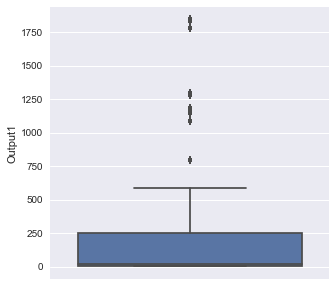

In [9]:
plt.figure(figsize=(5, 5))
sns.boxplot(y='Output1', data=final_df)

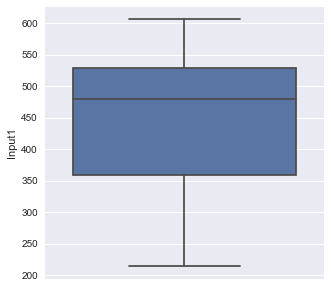

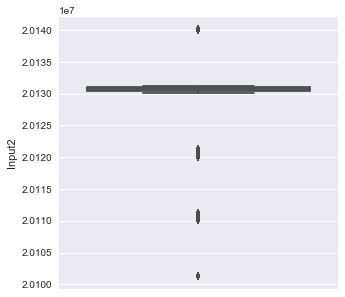

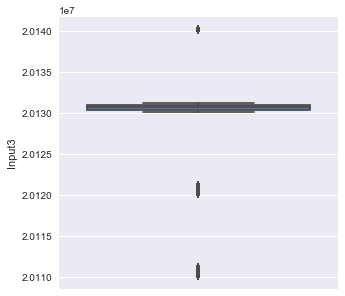

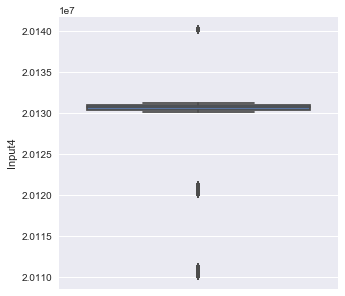

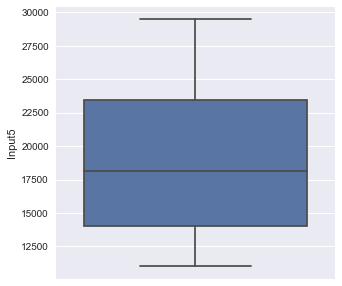

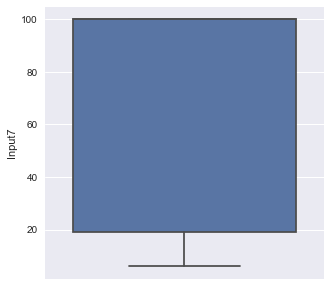

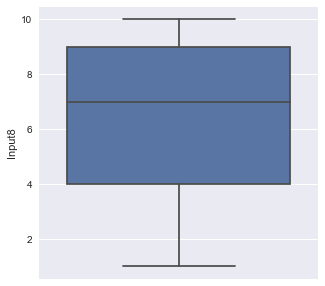

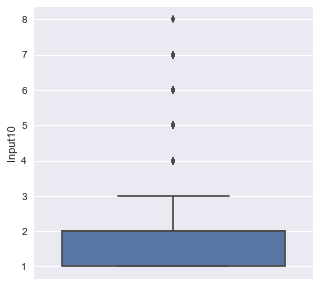

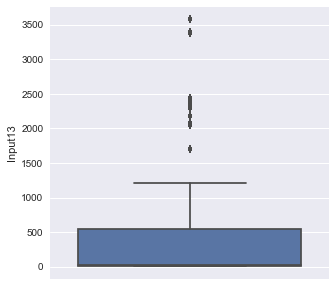

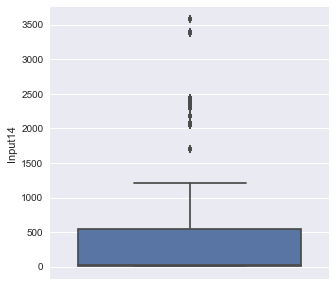

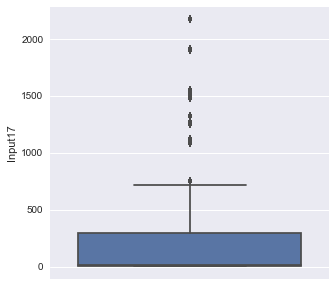

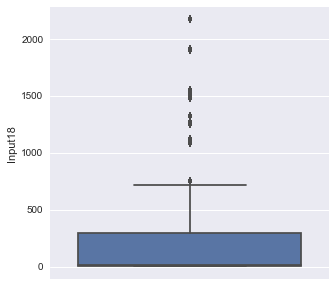

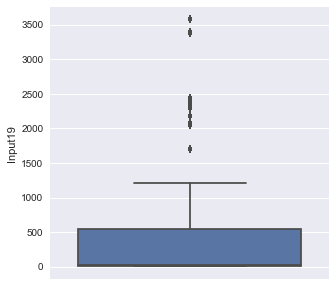

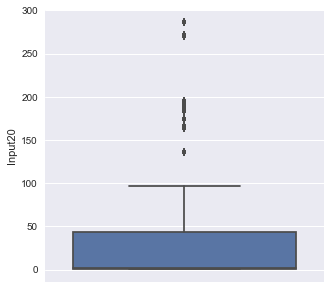

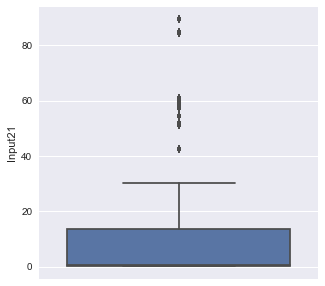

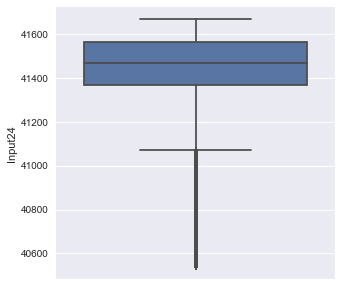

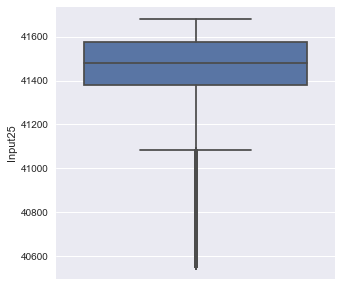

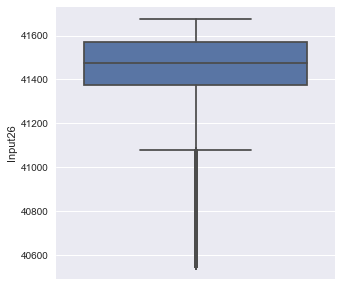

In [10]:
cont_cols = [col for col in final_df.columns if col not in ['Output1']]
for col in cont_cols:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=col, data=final_df)

c:\users\brsingh\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


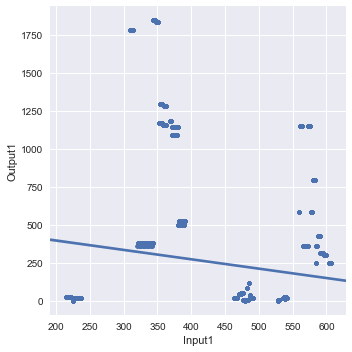

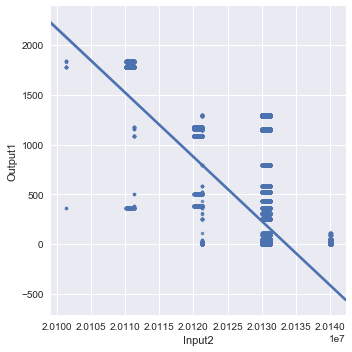

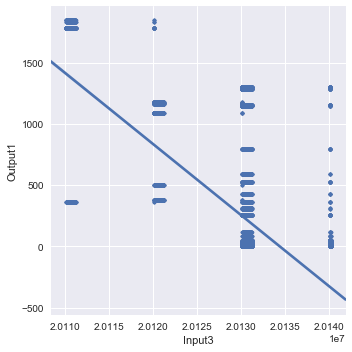

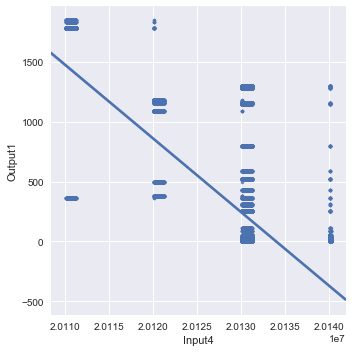

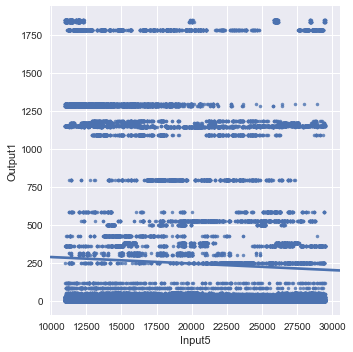

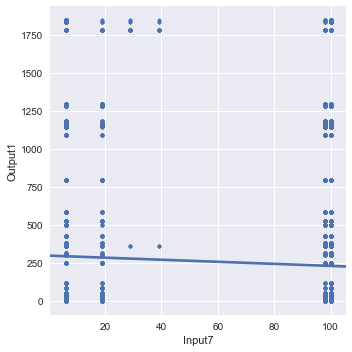

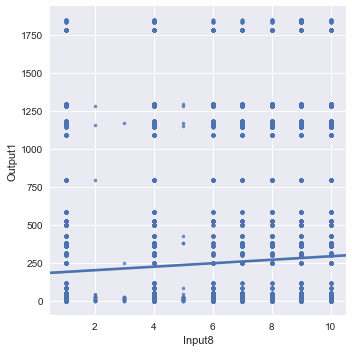

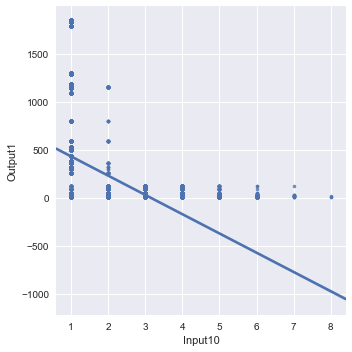

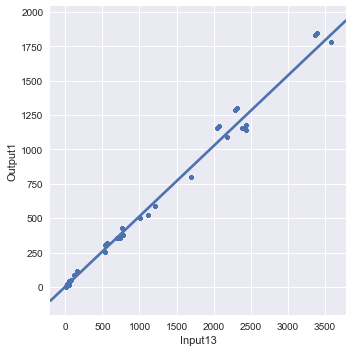

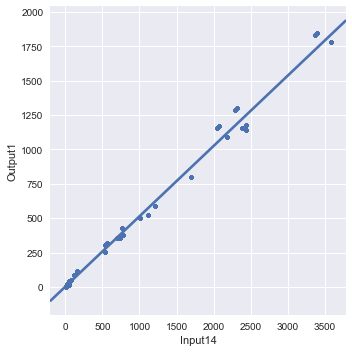

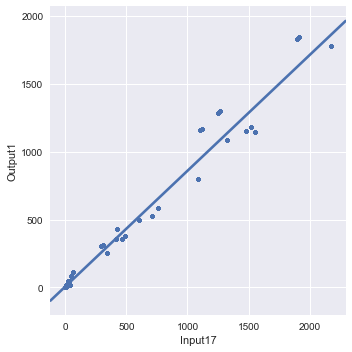

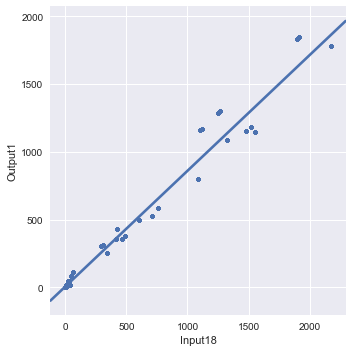

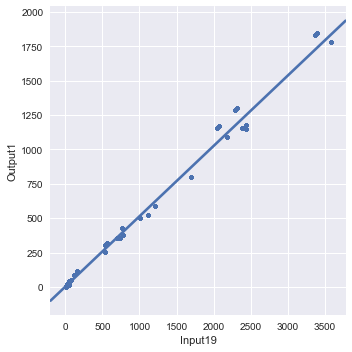

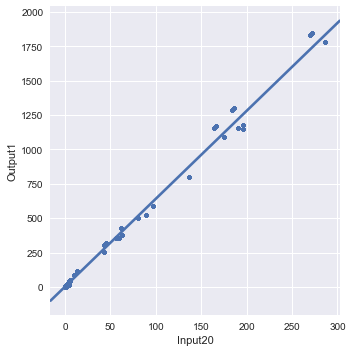

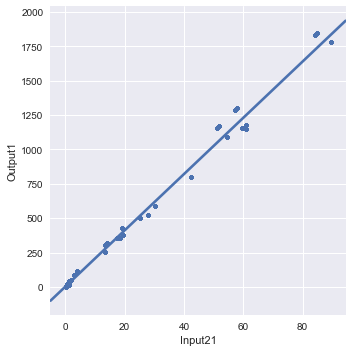

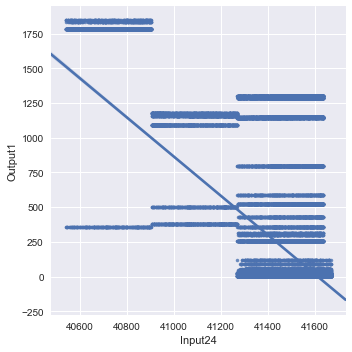

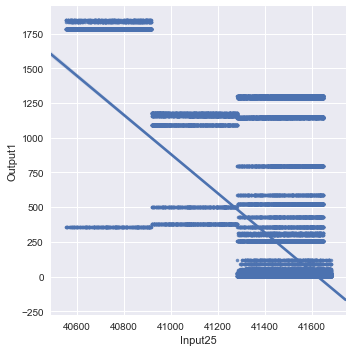

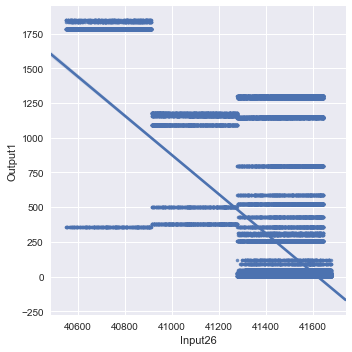

In [11]:
for i in cont_cols:
    sns.lmplot(x=i,y='Output1',data=final_df,markers='.')
    

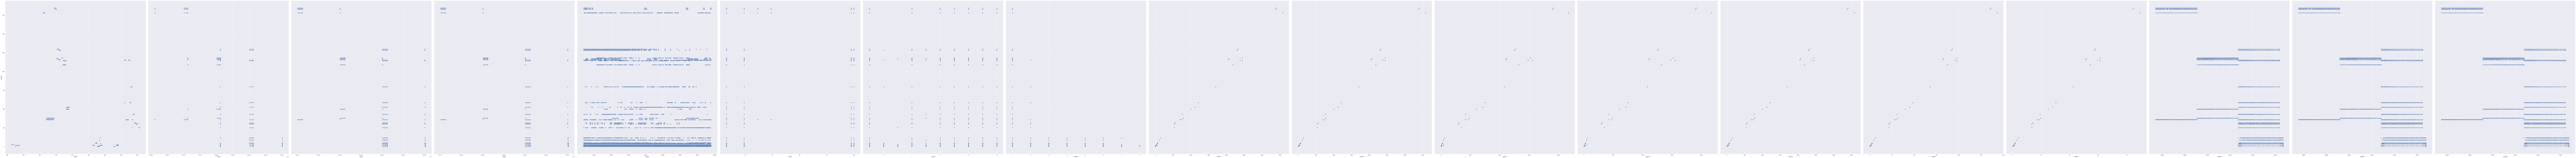

In [12]:
sns.pairplot(final_df, x_vars=cont_cols, y_vars='Output1',size=20, aspect=0.9, kind='scatter')

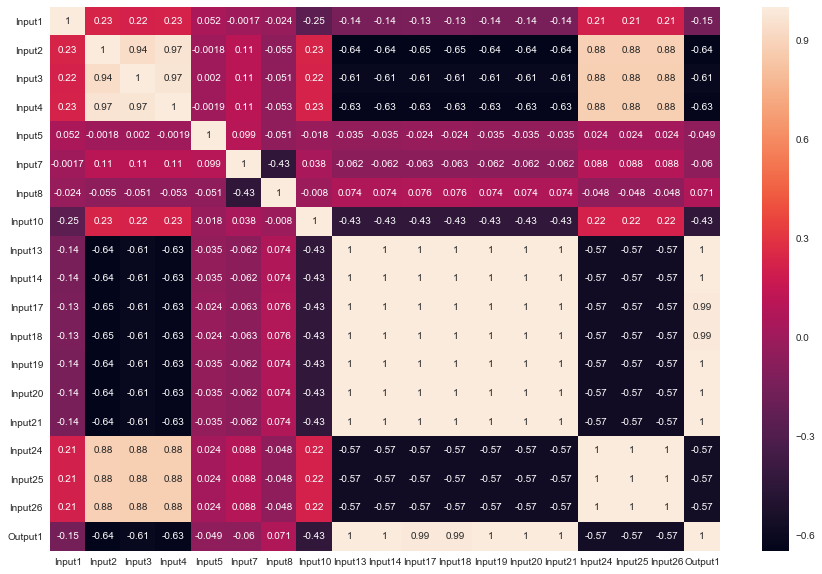

In [13]:
plt.figure(figsize = (15,10))
sns.heatmap(final_df.corr(),annot = True)

In [14]:
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

#defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))

# UDF for feature getting feature variable
def get_feature_variable(df,dependent_var):
    return df.loc[:,df.columns!=dependent_var], df[dependent_var]
                                            
                                              
# applying normalize ( ) to all columns 
# final_df = final_df.apply(normalize)

In [15]:
# Putting feature variable to X
# Putting response variable to y

# scaler = StandardScaler()
# features = scaler.fit_transform(final_df.values)
# final_df = pd.DataFrame(features, index=final_df.index, columns=final_df.columns)


                                           
                                              
# applying normalize ( ) to all columns 
final_df = final_df.apply(normalize) 



In [16]:
round(100*(final_df.isnull().sum()/len(final_df.index)), 2)

Input1     0.0
Input2     0.0
Input3     0.0
Input4     0.0
Input5     0.0
Input7     0.0
Input8     0.0
Input10    0.0
Input13    0.0
Input14    0.0
Input17    0.0
Input18    0.0
Input19    0.0
Input20    0.0
Input21    0.0
Input24    0.0
Input25    0.0
Input26    0.0
Output1    0.0
dtype: float64

In [17]:
X,y = get_feature_variable(final_df, 'Output1')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [19]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(42278, 18) (18120, 18) (42278,) (18120,)


## LinearRegression

In [20]:
lrm = LinearRegression()
linear_model = lrm.fit(X_train,y_train)

y_pred_lr=linear_model.predict(X_test)  

print('RMSE of predicted RH in RF model:',np.sqrt(mean_squared_error(y_test,y_pred_lr)))

mse = mean_squared_error(y_test, y_pred_lr)
r_squared = r2_score(y_test, y_pred_lr)
print('Mean_Squared_Error :' ,mse)
print('Model Accuracy r_square_value :',r_squared)

from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))) 

RMSE of predicted RH in RF model: 2.3004652426616953e-16
Mean_Squared_Error : 5.292140332694532e-32
Model Accuracy r_square_value : 1.0
Mean Absolute Error: 1.7228188566235827e-16
Mean Squared Error: 5.292140332694532e-32
Root Mean Squared Error: 2.3004652426616953e-16


In [21]:
y_test.shape

(18120,)

Text(0,0.5,'Views')

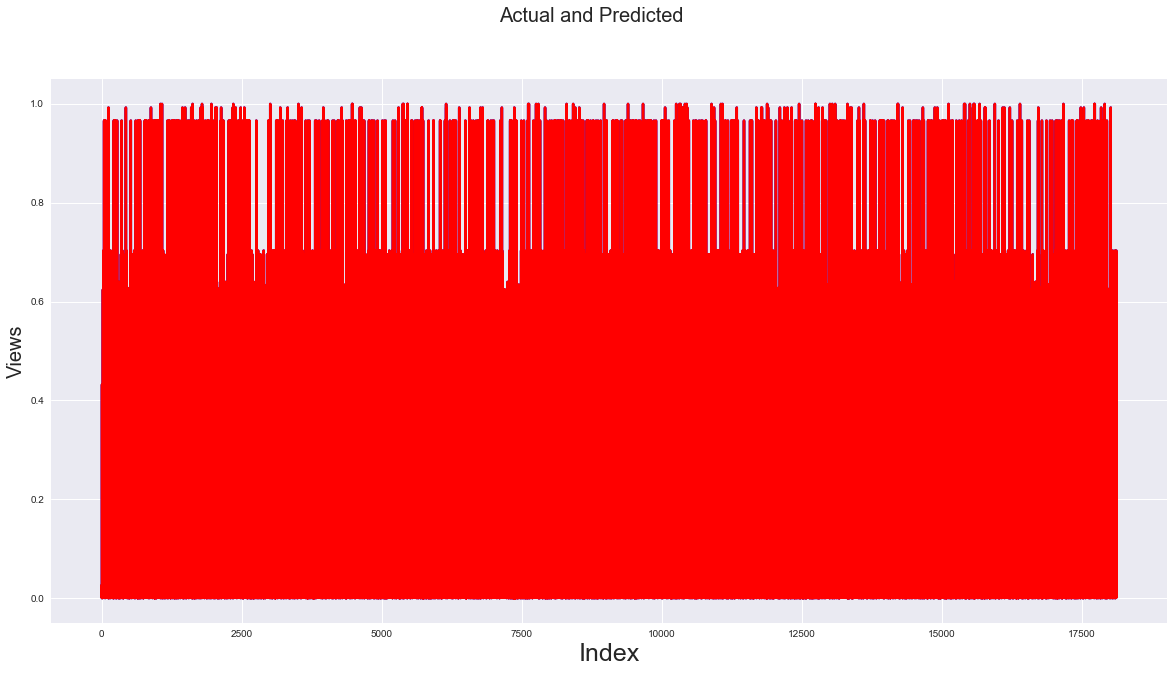

In [22]:
#Actual vs Predicted
# As we can see the model is fiting properly
c = [i for i in range(1,18121,1)]
fig = plt.figure(figsize=(20, 10))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred_lr, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=25)                               # X-label
plt.ylabel('Views', fontsize=20)                               # Y-label

Text(0,0.5,'Views_show-Predicted_views')

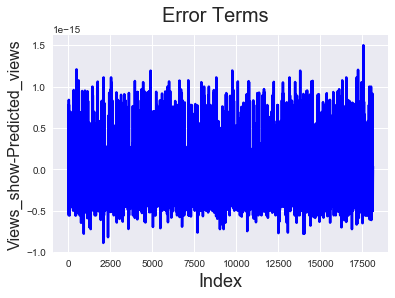

In [23]:
# Error terms
c = [i for i in range(1,18121,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred_lr, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label

Text(0,0.5,'y_pred')

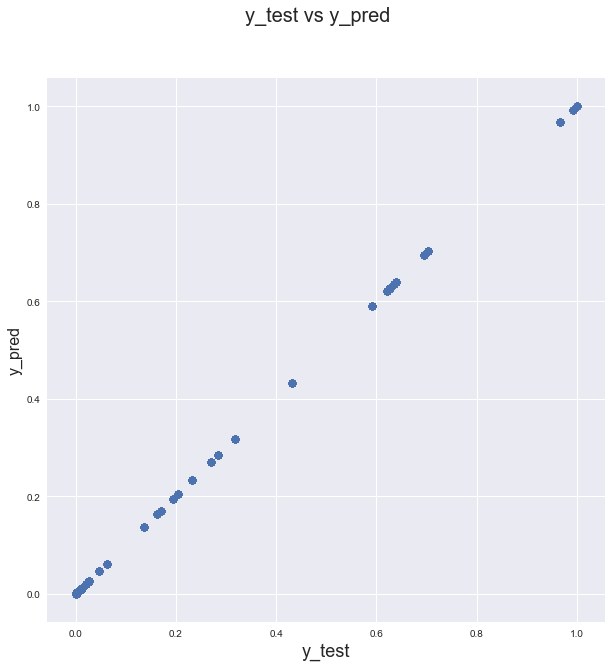

In [24]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred_lr)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [25]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_lr})  
df.head(10)

,Actual,Predicted
28753,0.431547,4.315468e-01
58118,0.000000,5.187615e-16
18860,0.026850,2.684991e-02
44117,0.001071,1.070824e-03
22099,0.008905,8.904650e-03
59076,0.012969,1.296886e-02
30019,0.012969,1.296886e-02
27614,0.012969,1.296886e-02
9417,0.026850,2.684991e-02
16537,0.001071,1.070824e-03


# With OLS model

In [26]:
X_train_1 = sm.add_constant(X_train)
# create a fitted model in one line
ols_model = sm.OLS(y_train,X_train_1).fit()

In [27]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                Output1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.875e+23
Date:                Fri, 14 Dec 2018   Prob (F-statistic):               0.00
Time:                        13:21:05   Log-Likelihood:             9.5910e+05
No. Observations:               42278   AIC:                        -1.918e+06
Df Residuals:                   42264   BIC:                        -1.918e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.677e-15   1.94e-12     -0.001      0.9

In [28]:
colVal = X_train.columns
columns=[]
# columns.append('const')
columns.extend(list(colVal))

cofficient=[]
x=True
for val in columns:
    cofficient.append(round(pd.Series(ols_model.params).get(val),2))

def newPrint(val, string):
    if val==1:
        return '+['+string+'*'+str(val)+']'
    elif val==0:
        return ''
    return '+['+string+'*'+str(val)+']'

def getEquestion(li,col):
    temp="f(x)="
    for v in range(len(col)):
         temp=temp+(newPrint(li[v],col[v]))
    return temp

print('Equestion: ',getEquestion(cofficient,columns))

Equestion:  f(x)=+[Input13*0.65]+[Input14*0.65]+[Input17*-0.59]+[Input18*-0.59]+[Input19*0.65]+[Input20*0.16]+[Input21*0.05]


### Polynomial model

In [29]:
# vari = ['NO2(GT)','NMHC(GT)','NOx(GT)','RH','PT08.S3(NOx)','PT08.S4(NO2)','T','AH','RH']
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X_train)
predict_ = poly.fit_transform(X_test)

clf = LinearRegression()
clf.fit(X_, y_train)
pred=clf.predict(predict_)

In [30]:
print('RMSE of predicted RH in RF model:',np.sqrt(mean_squared_error(y_test,pred)))

mse = mean_squared_error(y_test, pred)
r_squared = r2_score(y_test, pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

poly_df = pd.DataFrame({'Actual':y_test, 'Predicted':pred})
poly_df.head(10)

RMSE of predicted RH in RF model: 1.3293055117779994e-13
Mean_Squared_Error : 1.7670531436433688e-26
r_square_value : 1.0


,Actual,Predicted
28753,0.431547,4.315468e-01
58118,0.000000,1.632444e-13
18860,0.026850,2.684991e-02
44117,0.001071,1.070824e-03
22099,0.008905,8.904650e-03
59076,0.012969,1.296886e-02
30019,0.012969,1.296886e-02
27614,0.012969,1.296886e-02
9417,0.026850,2.684991e-02
16537,0.001071,1.070824e-03


In [31]:
X_train_poly = sm.add_constant(X_)
# create a fitted model in one line
poly_ols_model = sm.OLS(y_train,X_train_poly).fit()

print(poly_ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                Output1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.162e+09
Date:                Fri, 14 Dec 2018   Prob (F-statistic):               0.00
Time:                        13:21:07   Log-Likelihood:             3.3166e+05
No. Observations:               42278   AIC:                        -6.631e+05
Df Residuals:                   42178   BIC:                        -6.623e+05
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.448e-15   5.12e-05  -6.74e-11      1.0

In [32]:
def _combinations(n_features, degree, interaction_only, include_bias):
        comb = (combinations if interaction_only else combinations_w_r)
        start = int(not include_bias)
        return chain.from_iterable(comb(range(n_features), i)
                                   for i in range(start, degree + 1))
    
combinations = _combinations(24, 2,False,True)
# print(combinations)
val_o = np.vstack([np.bincount(c, minlength=24) for c in combinations])
print(val_o.shape)
print(val_o)

colList=[]
colList.append('const')
for i in range(1,325):    
    colList.append("x"+str(i))

cofficient=[]
x=True
for val in colList:
    cofficient.append(poly_ols_model.params.get(val))

(325, 24)
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 2]]


In [33]:
output = cofficient #[1,2,3,4,5,6,7,8,9,0]
rel=""
cols=colList
val = val_o

def newPrint(val, string):
    if val==1:
        return string
    elif val==0:
        return ''
    return '['+string+'^'+str(val)+']'

for array in range(len(val)):
    if(output[array]==None):
        continue
    if(round(output[array])==0):
        continue
    temp="("+str(round(output[array],2))+")*"
    for index in range(len(val[array])):
        temp+=(newPrint(val[array][index],cols[index]))
    rel = rel+" + "+temp
print('Equestion:  f(x)=',rel[2:])

Equestion:  f(x)=  (0.65)*x8 + (0.65)*x9 + (-0.59)*x10 + (-0.59)*x11 + (0.65)*x12


## With Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor           #import random forest regressor
rf_reg=RandomForestRegressor()

rf_model=rf_reg.fit(X_train,y_train)         #fit model   
y_pred_rf=rf_model.predict(X_test)           #predict

print(rf_model.score(X_test,y_test))

c:\users\brsingh\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9999997875117381


In [35]:
print('RMSE of predicted RH in RF model:',np.sqrt(mean_squared_error(y_test,y_pred_rf)))
mse = mean_squared_error(y_test, y_pred_rf)
r_squared = r2_score(y_test, y_pred_rf)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

RMSE of predicted RH in RF model: 0.0001191039884726794
Mean_Squared_Error : 1.4185760070100147e-08
r_square_value : 0.9999997875117381


['Input1' 'Input2' 'Input3' 'Input4' 'Input5' 'Input7' 'Input8' 'Input10'
 'Input13' 'Input14' 'Input17' 'Input18' 'Input19' 'Input20' 'Input21'
 'Input24' 'Input25' 'Input26']


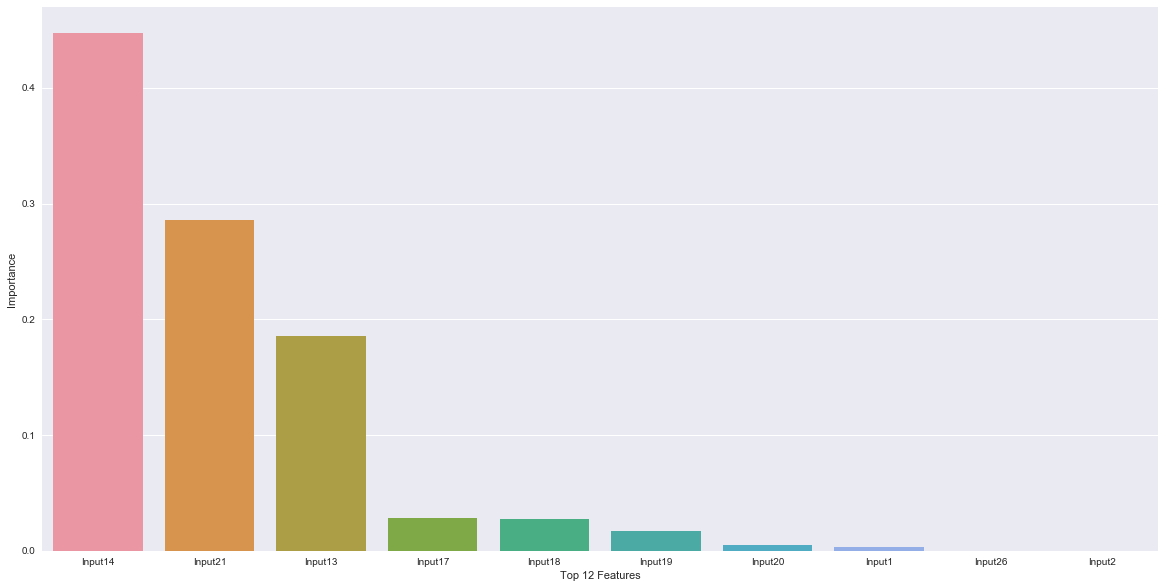

In [36]:

imp=rf_model.feature_importances_
names=X_train.columns.values
print(names)
imp,names=zip(*sorted(zip(imp,names)))

df_1=pd.DataFrame({"Variable":names,"importance":imp})
df_2 = df_1.sort_values(by="importance",axis=0,ascending=False)
df_2 = df_2.reset_index(drop=True)


plt.figure(figsize=(20, 10))

ax = sns.barplot(x='Variable', y= 'importance', data=df_2[0:10])
ax.set(xlabel = 'Top 12 Features', ylabel = 'Importance')
plt.show()

## Feature Selection with RFE

In [37]:
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [38]:
def get_RFE(independent_data,dependent_data, no_of_variable):
    lm = LinearRegression()
    rfe = RFE(lm, no_of_variable)             # running RFE
    rfe = rfe.fit(independent_data, dependent_data)
    return rfe

In [49]:
#Apply RFE to reduce the Feature
rfe = get_RFE(X_train, y_train, 3)
col_m2 = X_train.columns[rfe.support_]
print('List of Columns After RFE:')
print(list(col_m2))

List of Columns After RFE:
['Input13', 'Input14', 'Input19']


In [50]:
# print(col_m2)
col = list(col_m2)
col.append('Output1')
vif_cal(input_data=final_df[col], dependent_col="Output1")

,Var,Vif
0,Input13,3224.92
1,Input14,3224.92
2,Input19,3224.92


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X[col_m2], y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [42]:
lrm1 = LinearRegression()
model1 = lrm1.fit(X_train,y_train)

In [43]:
y_pred_lr=model1.predict(X_test)  
print('RMSE of predicted RH in RF model:',np.sqrt(mean_squared_error(y_test,y_pred_lr)))

mse = mean_squared_error(y_test, y_pred_lr)
r_squared = r2_score(y_test, y_pred_lr)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

RMSE of predicted RH in RF model: 8.906835190558056e-09
Mean_Squared_Error : 7.933171311176337e-17
r_square_value : 0.9999999999999988


In [44]:
#Actual vs Predicted
# # As we can see the model is fiting properly
# c = [i for i in range(1,2809,1)]
# fig = plt.figure(figsize=(20, 10))
# plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
# plt.plot(c,y_pred_lr, color="red",  linewidth=2.5, linestyle="-")
# fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
# plt.xlabel('Index', fontsize=25)                               # X-label
# plt.ylabel('Views', fontsize=20)                               # Y-label

Text(0,0.5,'y_pred')

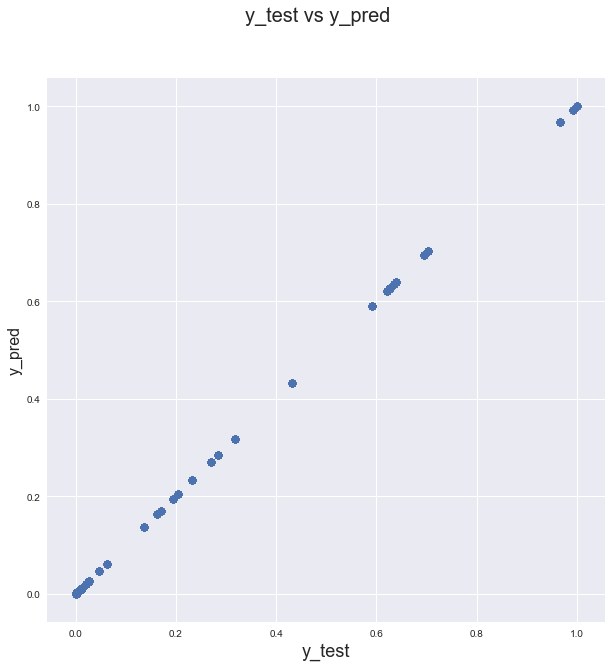

In [45]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred_lr)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## With SVM Model

In [46]:
from sklearn.svm import SVR           #import support vector regressor
sv_reg=SVR(kernel='linear')

In [47]:
sv_model=sv_reg.fit(X_train,y_train)

In [48]:
y_pred_sv=sv_model.predict(X_test)  
print('RMSE of predicted RH in RF model:',np.sqrt(mean_squared_error(y_test,y_pred_sv)))

mse = mean_squared_error(y_test, y_pred_sv)
r_squared = r2_score(y_test, y_pred_sv)
print('Mean_Squared_Error :' ,mse)
print('Model Accuracy r_square_value :',r_squared)

RMSE of predicted RH in RF model: 0.0868319231288169
Mean_Squared_Error : 0.007539782874248768
Model Accuracy r_square_value : 0.8870617189255339
